1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
from sklearn.externals.six import StringIO


df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

/Users/ChiragSachar/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [2]:
df_default = pd.get_dummies(df['default'])
df_student = pd.get_dummies(df['student'])
df_final = pd.concat([df[['balance', 'income']],df_default, df_student],axis=1)
df_final.columns = ['balance', 'income', 'default_No','default_Yes','student_No','student_Yes']
df_final.head()

,balance,income,default_No,default_Yes,student_No,student_Yes
1,729.526495,44361.625074,1.0,0.0,1.0,0.0
2,817.180407,12106.134700,1.0,0.0,0.0,1.0
3,1073.549164,31767.138947,1.0,0.0,1.0,0.0
4,529.250605,35704.493935,1.0,0.0,1.0,0.0
5,785.655883,38463.495879,1.0,0.0,1.0,0.0


3) Make boxplots of all of the variables and a scatter plot of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

/Users/ChiragSachar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x115c959b0>,
 'caps': [<matplotlib.lines.Line2D at 0x115c89e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x11e2c5f98>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115c93f28>,
 'whiskers': [<matplotlib.lines.Line2D at 0x115c95c88>,
  <matplotlib.lines.Line2D at 0x120588a90>]}

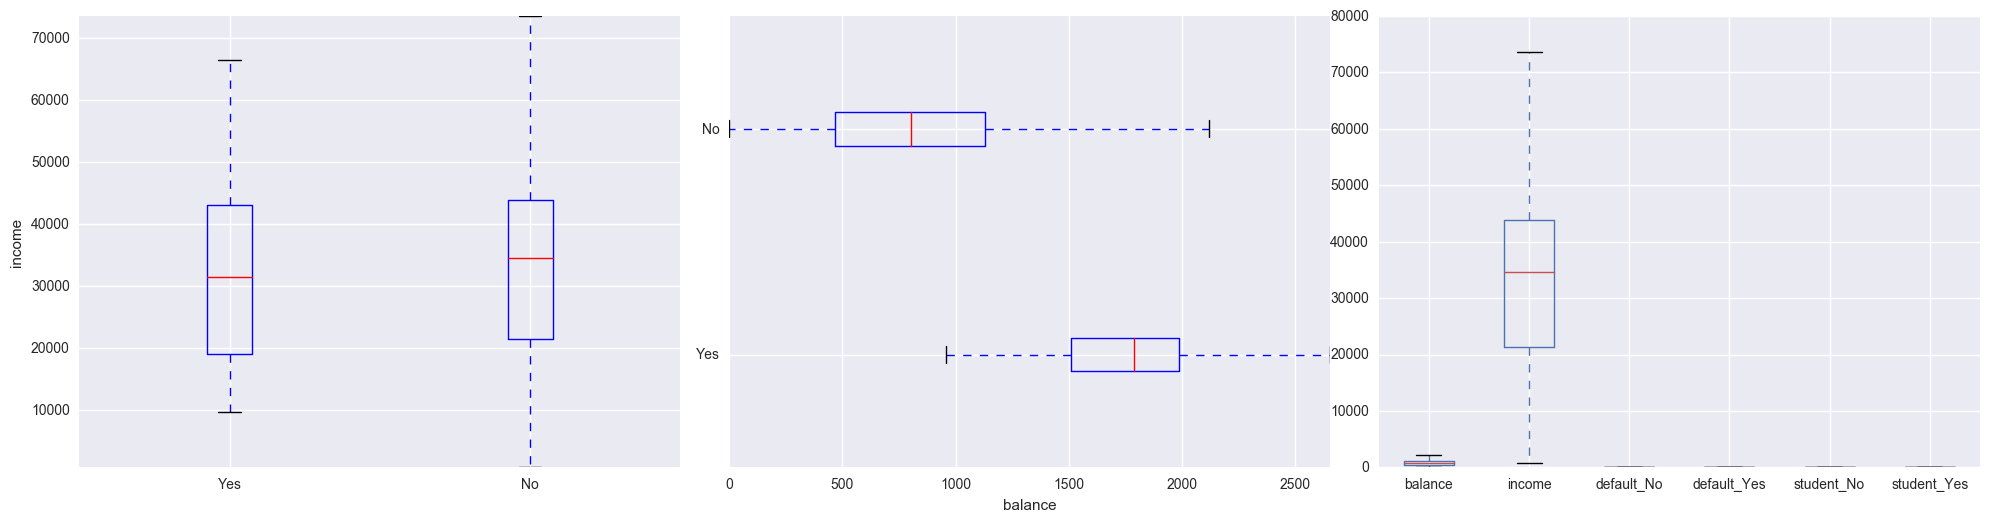

In [38]:
#Boxplots of all varaibles 
plt.figure(figsize=(20, 15))

#Income Boxplot
ax = plt.subplot(3,3,1)
ax.boxplot([df.income[df.default == 'Yes'], df.income[df.default == 'No']])
ax.set_ylim((df.income.min(), df.income.max()))
ax.set_xticklabels(('Yes', 'No'))
ax.set_ylabel('income')

#Balance Boxplot
ax1 = plt.subplot(3,3,2)
ax1.boxplot([df.balance[df.default == 'Yes'], df.balance[df.default == 'No']], vert=0)
ax1.set_xlim((df.balance.min(), df.balance.max()))
ax1.set_yticklabels(('Yes', 'No'))
ax1.set_xlabel('balance')
plt.tight_layout()

#Boxplot comparing all variables 
ax3 = plt.subplot(3,3,3)
df_final.boxplot()

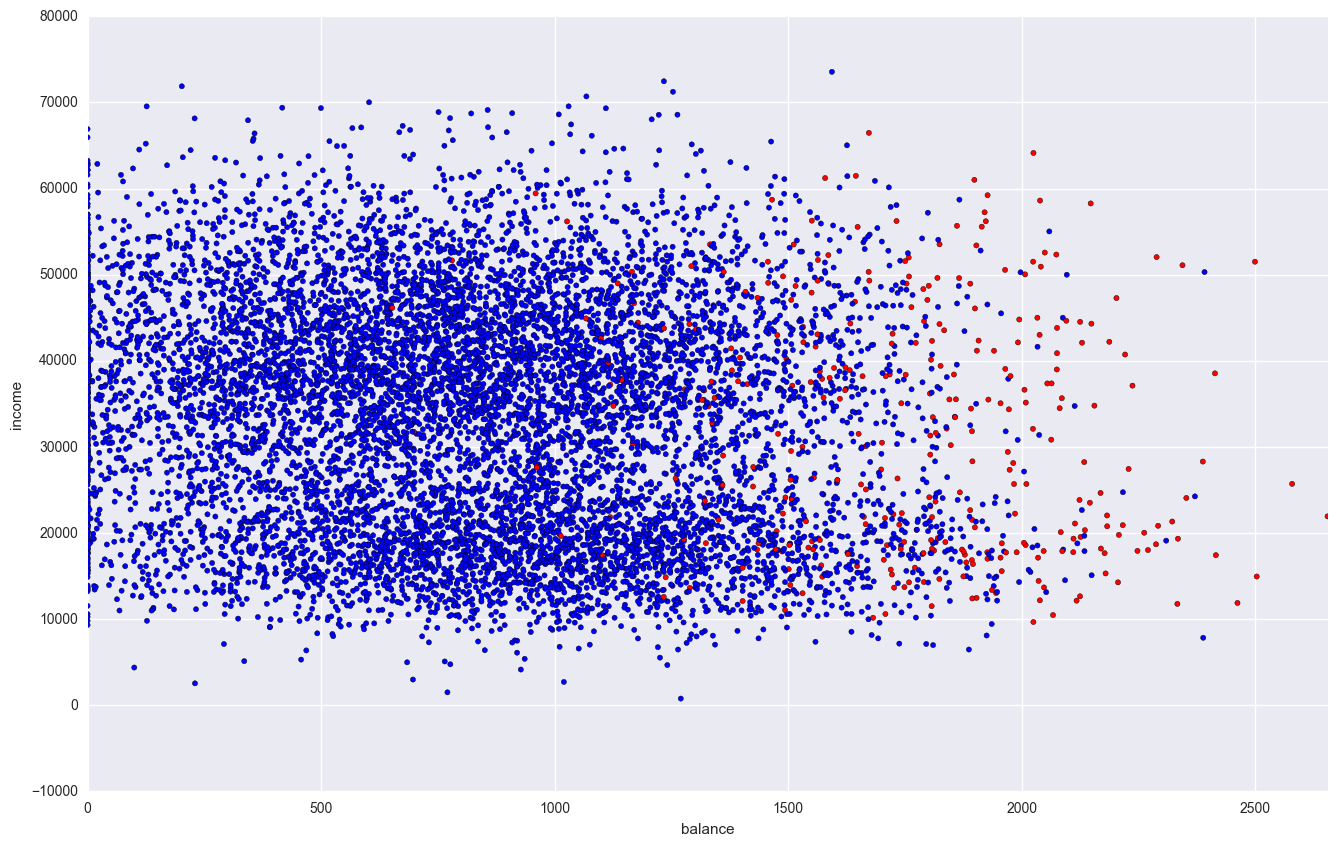

In [86]:
#Scatterplot of balance vs. income

plt.figure(figsize=(16, 10))
color = ListedColormap(['r','b'])
plt.scatter(df.balance, df.income, s = 14, c=(df.default == 'No'), cmap = color)
plt.xlim((df.balance.min(), df.balance.max()))
plt.xlabel('balance')
plt.ylabel('income')

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

<a list of 6 text.Text objects>

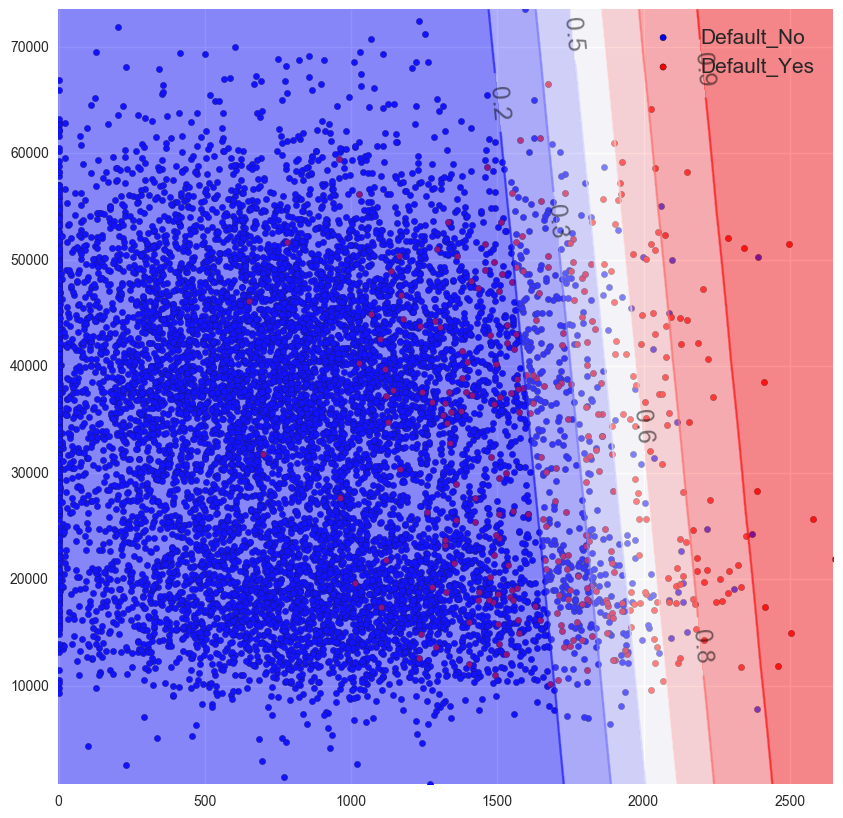

In [162]:
X = df_final[['balance', 'income']]
y = df_final.default_Yes
defaultY = df_final[df_final.default_Yes == 1]
defaultN = df_final[df_final.default_No == 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30)

clf = LogisticRegression(penalty='l1')
clf.fit(X_train,y_train)

plt.figure(figsize=(10, 10))
h = 50
x_min, x_max = df_final[['balance']].min() - 0.5, df_final[['balance']].max() + 0.5
y_min, y_max = df_final[['income']].min() - 0.5, df_final[['income']].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax1 = plt.gca()
ax1.scatter(defaultN['balance'],defaultN['income'],c='b',label = 'Default_No')
ax1.scatter(defaultY['balance'],defaultY['income'],c='r',label='Default_Yes')
ax1.legend(prop={'size':15})
c = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
c = c.reshape(xx.shape)
cs = ax1.contourf(xx, yy, c, cmap='bwr', alpha=.5)
cs1 = ax1.contour(xx, yy, c, cmap='bwr', alpha=.5)
plt.clabel(cs1, fmt = '%2.1f', colors = 'k', fontsize=18)

Area under the ROC curve : 0.943497


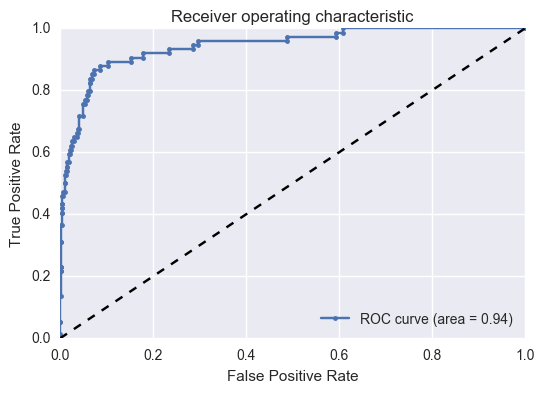

In [19]:
y = df_final['default_Yes']
X = df_final[['balance','income']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % (roc_auc))
    return fpr, tpr, roc_auc, thresholds

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

Area under the ROC curve : 0.944129


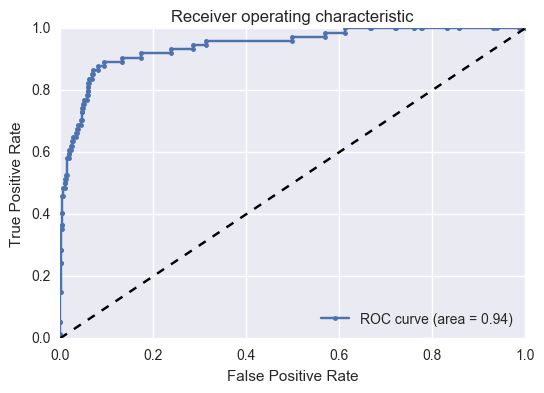

In [163]:
y = df_final['default_Yes'].copy()
X = df_final[['balance','income','student_Yes','student_No']].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % (roc_auc))
    return fpr, tpr, roc_auc, thresholds

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

Area under the ROC curve : 0.930013


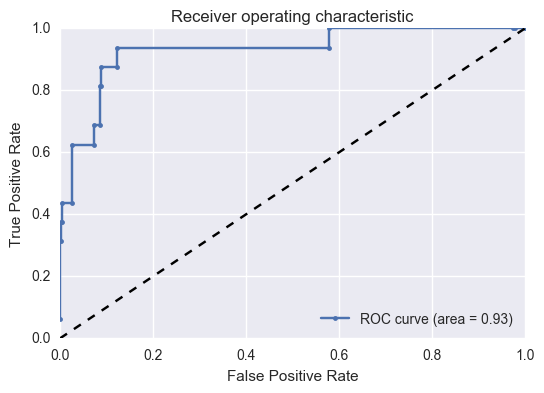

Area under the ROC curve : 0.974892


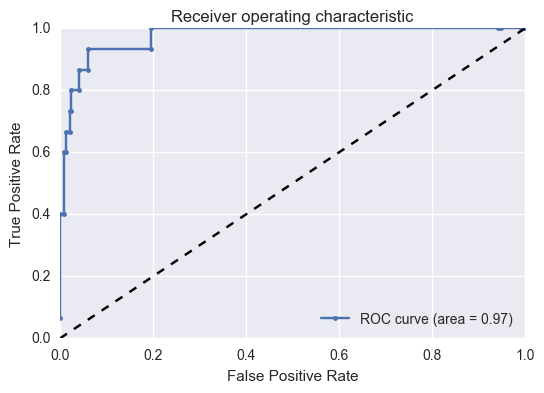

Area under the ROC curve : 0.959654


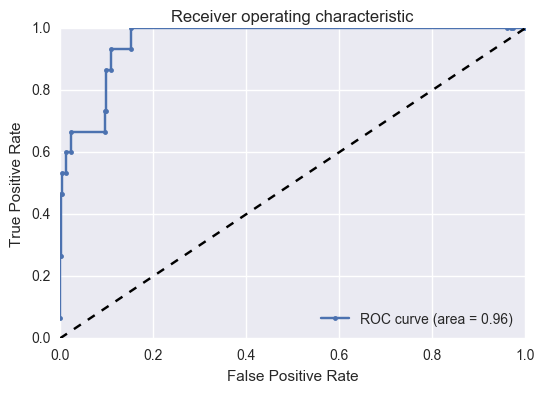

Area under the ROC curve : 0.970769


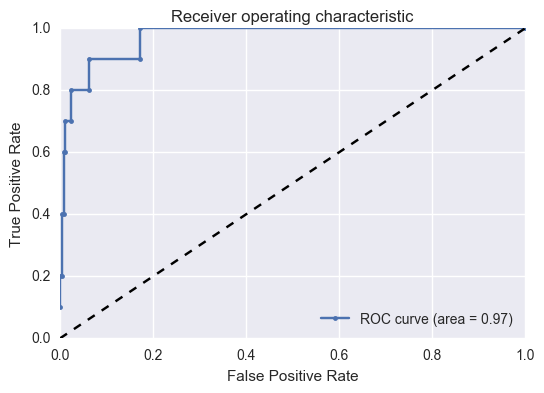

Area under the ROC curve : 0.946249


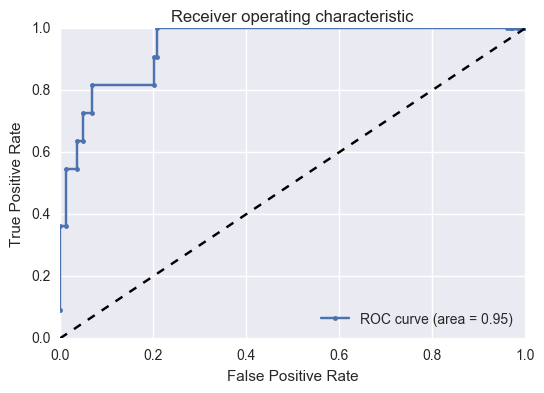

Area under the ROC curve : 0.947499


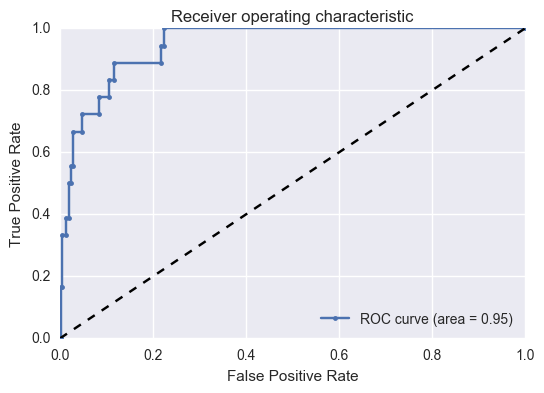

In [168]:
randFolds = [10,20,40,60,80,100]
for f in randFolds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=f)
    fpr,tpr,roc_auc, thresholds = generate_auc(X_test,y_test,LogisticRegression,C=100,penalty='l1')
    generate_ROCplot(fpr,tpr,'LR',roc_auc)

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [3]:
from sklearn.tree import DecisionTreeClassifier
from __future__ import print_function
import os
import subprocess
from IPython.display import Image
import numpy.random as nprnd
from PIL import Image, ImageFilter
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus


def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

Automatically created module for IPython interactive environment


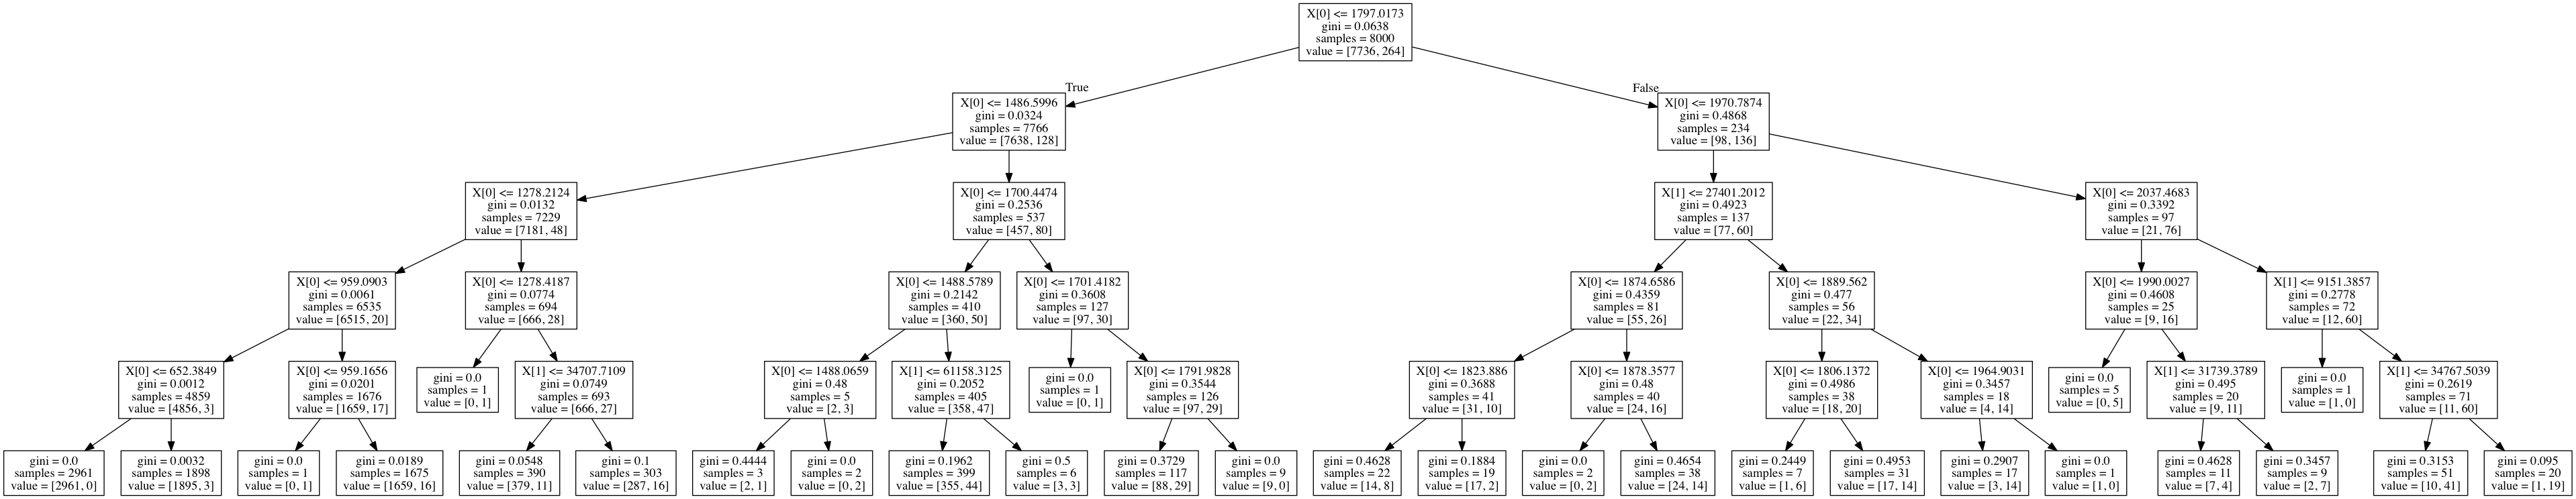

In [14]:
y = df_final['default_Yes']
X = df_final[['balance','income']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

print(__doc__)
%matplotlib inline

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y = tree.predict(X_test)

dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(tree, feature_names=['x'])

dot_data=export_graphviz(tree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [7]:
#Answer: The Ridge regression model is slightly better than the decision tree because it has a slightly lower AUC ROC value


8) Find the optimal decision tree depth and compute the AUC ROC. 

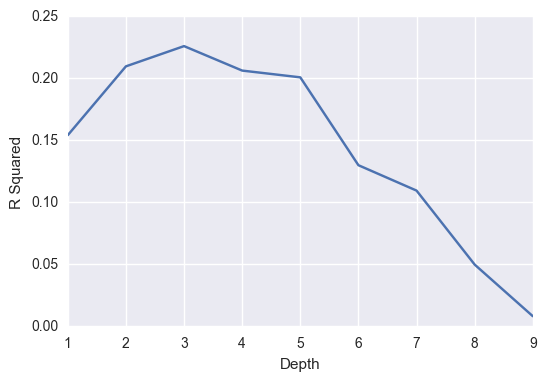

In [13]:
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,10)
for n in depths:
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    train_errors.append(tree.score(X_train,y_train))
    scores.append(tree.score(X_test,y_test))
plt.ylabel('R Squared')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]

In [ ]:
#Answer: Optimal deciscion tree depth: 3

Area under the ROC curve : 0.949885


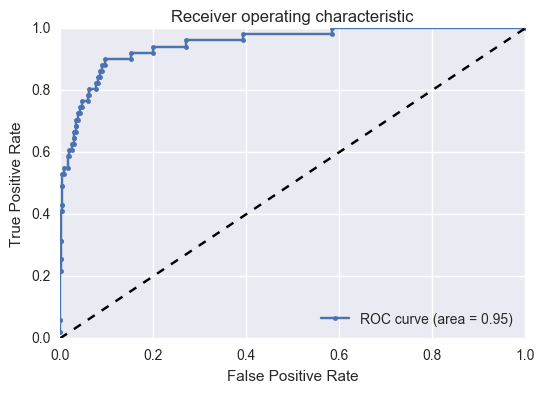

In [30]:
y = df_final['default_Yes']
X = df_final[['balance','income']]

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, y)

fpr,tpr,roc_auc, thresholds = generate_auc(X_train,y_train,LogisticRegression,C=100,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)